In [1]:
import pandas as pd

In [2]:
#the output from translate_desc_to_en.ipynb is primarily used here (with new variables like job type, experience etc using key word search )
job_data = pd.read_csv("cleaned_data_3.0.csv")
job_data.head()

,Industry,jobID,jobTitle,sector,employerName,jobTitle.1,location,locationType,map.country,map.lat,...,salary.salaries,Cleaned_Desc,Desc_Language,Translated_Desc,Cleaned Title,matched variation,similarity_score,experience_level,job_type,Country_name
0,Investment Banking & Asset Management,3.227100e+09,Biogas Project Development Manager,Finance,Modus Group,Biogas Project Development Manager,Warsaw,C,Poland,52.2500,...,2483.0,We are the drivers of the future who offer a g...,en,We are the drivers of the future who offer a g...,business manager,business development manager,81.0,senior,internship,Poland
1,Biotech & Pharmaceuticals,3.406582e+09,Quality Manager - Boehringer Ingelheim Healthc...,Biotech & Pharmaceuticals,Boehringer Ingelheim,Quality Manager - Boehringer Ingelheim Healthc...,Porto,C,NaN,41.1500,...,2484.0,Description:Join Boehringer Ingelheim and be p...,en,Description:Join Boehringer Ingelheim and be p...,business manager,BD manager,82.0,senior,internship,Portugal
2,NaN,3.230738e+09,"Senior Software Engineer (PHP, Elixir, Python)",NaN,Immobiliare.it,"Senior Software Engineer (PHP, Elixir, Python)",Milan,C,Italy,45.4667,...,2485.0,Dottori.it e il motore di ricerca che ti aiuta...,it,Dottori.it is the search engine that helps you...,software developer,software engineer,100.0,senior,full_time,Italy
3,NaN,3.406677e+09,Senior SQA Engineer,NaN,Codup,Senior SQA Engineer,Karāchi,C,PK,24.8667,...,2486.0,Codup is looking for a Senior SQA Engineer for...,en,Codup is looking for a Senior SQA Engineer for...,database engineer,DB engineer,84.0,senior,full_time,Pakistan
4,Consulting,3.201516e+09,Research Manager,Business Services,MARKELYTICS SOLUTIONS INDIA,Research Manager,Bengaluru,C,IN,12.9670,...,2487.0,Department: Research & OperationsVacancies: 3E...,en,Department: Research & OperationsVacancies: 3E...,research scientist,Quantitative Researcher,67.0,senior,full_time,India


In [4]:
job_data['Cleaned Title'].value_counts()

Cleaned Title
software developer             20557
business manager               19834
project manager                13976
database engineer              12572
business analyst               12214
data analyst                   10942
product manager                 8704
data scientist                  5653
data engineer                   4868
DevOps                          4797
machine learning engineer       4625
Consultant                      3912
research scientist              3639
database administrator          1364
Professor                        780
statistician                     670
UI/UX Developer or Designer      367
Name: count, dtype: int64

In [7]:
job_data['experience_level'].value_counts()

experience_level
senior    122952
entry       8572
Name: count, dtype: int64

In [8]:
job_data['job_type'].value_counts()

job_type
full_time     69013
internship    62511
Name: count, dtype: int64

In [9]:
job_data['similarity_score'].value_counts()

similarity_score
100.0    83756
84.0     12296
82.0     10082
67.0      3292
65.0      2622
78.0      2528
0.0       2037
69.0      1751
70.0      1688
71.0      1493
80.0      1310
73.0      1211
74.0      1187
81.0      1131
76.0       955
83.0       861
68.0       596
79.0       576
72.0       453
77.0       391
87.0       368
75.0       275
97.0       132
91.0       101
90.0        89
86.0        87
85.0        68
89.0        47
92.0        37
88.0        26
96.0        18
93.0        17
94.0        13
66.0        12
95.0         4
98.0         1
Name: count, dtype: int64

In [33]:
#removing jobs where sample size is very small or job title similarity is low
job_data1 = job_data[~(job_data['Cleaned Title'].isin(["UI/UX Developer or Designer","Professor",'statistician'])) &
                    (job_data['similarity_score'] >= 90)]
job_data1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 82911 entries, 2 to 131519
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Industry           62703 non-null  object 
 1   jobID              82765 non-null  float64
 2   jobTitle           82911 non-null  object 
 3   sector             62725 non-null  object 
 4   employerName       81912 non-null  object 
 5   jobTitle.1         82911 non-null  object 
 6   location           82911 non-null  object 
 7   locationType       82911 non-null  object 
 8   map.country        56588 non-null  object 
 9   map.lat            82911 non-null  float64
 10  map.lng            82911 non-null  float64
 11  map.location       82911 non-null  object 
 12  salary.salaries    76887 non-null  float64
 13  Cleaned_Desc       82911 non-null  object 
 14  Desc_Language      82911 non-null  object 
 15  Translated_Desc    82911 non-null  object 
 16  Cleaned Title      82911 n

In [34]:
#removing data for countries with less than 100 records
value_counts = job_data1['Country_name'].value_counts()
filtered_counts = value_counts[value_counts >= 100]
countries_list = filtered_counts.index.tolist()
print(countries_list)

['China', 'India', 'United Kingdom', 'United States', 'Singapore', 'Canada', 'Australia', 'Unknown', 'Germany', 'Poland', 'Philippines', 'Ireland', 'Netherlands', 'Malaysia', 'South Africa', 'Switzerland', 'Spain', 'Belgium', 'France', 'Indonesia', 'Israel', 'Sweden', 'Romania', 'United Arab Emirates', 'Italy', 'Japan', 'Mexico', 'New Zealand', 'Pakistan', 'Austria', 'Brazil', 'Hungary', 'Egypt', 'Ukraine', 'Denmark', 'Russia', 'Czechia', 'Thailand', 'Nigeria', 'Vietnam', 'Taiwan', 'Ethiopia', 'Saudi Arabia', 'Argentina', 'Bulgaria', 'Portugal', 'Turkey', 'Norway', 'Costa Rica', 'Lithuania', 'Greece', 'South Korea', 'Finland', 'Colombia', 'Luxembourg', 'Slovakia', 'Serbia', 'Kenya', 'Yemen', 'Burkina Faso', 'Estonia']


In [35]:
job_data1['job_type'].value_counts()

job_type
full_time     44291
internship    38620
Name: count, dtype: int64

In [36]:
job_data1['experience_level'].value_counts()

experience_level
senior    77457
entry      5454
Name: count, dtype: int64

In [37]:
job_data1['sector'].value_counts()

sector
Information Technology                24760
Business Services                     10361
Finance                                6074
Manufacturing                          5360
Biotech & Pharmaceuticals              2703
Telecommunications                     1523
Accounting & Legal                     1369
Retail                                 1197
Media                                  1039
Insurance                              1034
Health Care                             989
Oil, Gas, Energy & Utilities            968
Transportation & Logistics              877
Aerospace & Defense                     718
Travel & Tourism                        691
Education                               588
Construction, Repair & Maintenance      582
Government                              538
Real Estate                             359
Arts, Entertainment & Recreation        243
Non-Profit                              239
Consumer Services                       187
Agriculture & Forestry   

In [38]:
sector_list1 =['Information Technology','Business Services','Finance','Manufacturing']
sector_list2 = ['Biotech & Pharmaceuticals','Health Care','Insurance']

In [39]:
#further grouping sectors
job_data1['sector_new'] = 'Misc'
job_data1.loc[job_data1['sector'].isin(sector_list1),'sector_new'] = job_data1['sector']
job_data1.loc[job_data1['sector'].isin(sector_list2),'sector_new'] = 'Healthcare & Insurance'
job_data1['sector_new'].value_counts()

/var/folders/bz/qyvd1hfs07v7gkh9fbvpy51m0000gn/T/ipykernel_83665/2455764899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_data1['sector_new'] = 'Misc'


sector_new
Misc                      31630
Information Technology    24760
Business Services         10361
Finance                    6074
Manufacturing              5360
Healthcare & Insurance     4726
Name: count, dtype: int64

In [40]:
job_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82911 entries, 2 to 131519
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Industry           62703 non-null  object 
 1   jobID              82765 non-null  float64
 2   jobTitle           82911 non-null  object 
 3   sector             62725 non-null  object 
 4   employerName       81912 non-null  object 
 5   jobTitle.1         82911 non-null  object 
 6   location           82911 non-null  object 
 7   locationType       82911 non-null  object 
 8   map.country        56588 non-null  object 
 9   map.lat            82911 non-null  float64
 10  map.lng            82911 non-null  float64
 11  map.location       82911 non-null  object 
 12  salary.salaries    76887 non-null  float64
 13  Cleaned_Desc       82911 non-null  object 
 14  Desc_Language      82911 non-null  object 
 15  Translated_Desc    82911 non-null  object 
 16  Cleaned Title      82911 n

In [43]:
job_data2 = job_data1[["Cleaned Title",'sector_new','experience_level','job_type','Country_name','Translated_Desc',
                       'salary.salaries']]
job_data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82911 entries, 2 to 131519
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cleaned Title     82911 non-null  object 
 1   sector_new        82911 non-null  object 
 2   experience_level  82911 non-null  object 
 3   job_type          82911 non-null  object 
 4   Country_name      82911 non-null  object 
 5   Translated_Desc   82911 non-null  object 
 6   salary.salaries   76887 non-null  float64
dtypes: float64(1), object(6)
memory usage: 7.1+ MB


In [42]:
job_data2['Cleaned Title'].value_counts()

Cleaned Title
software developer           18451
project manager              13050
business analyst             10479
data analyst                 10086
product manager               8158
business manager              5691
data scientist                3531
data engineer                 3302
DevOps                        2956
Consultant                    2362
research scientist            2293
machine learning engineer     1091
database administrator         758
database engineer              703
Name: count, dtype: int64

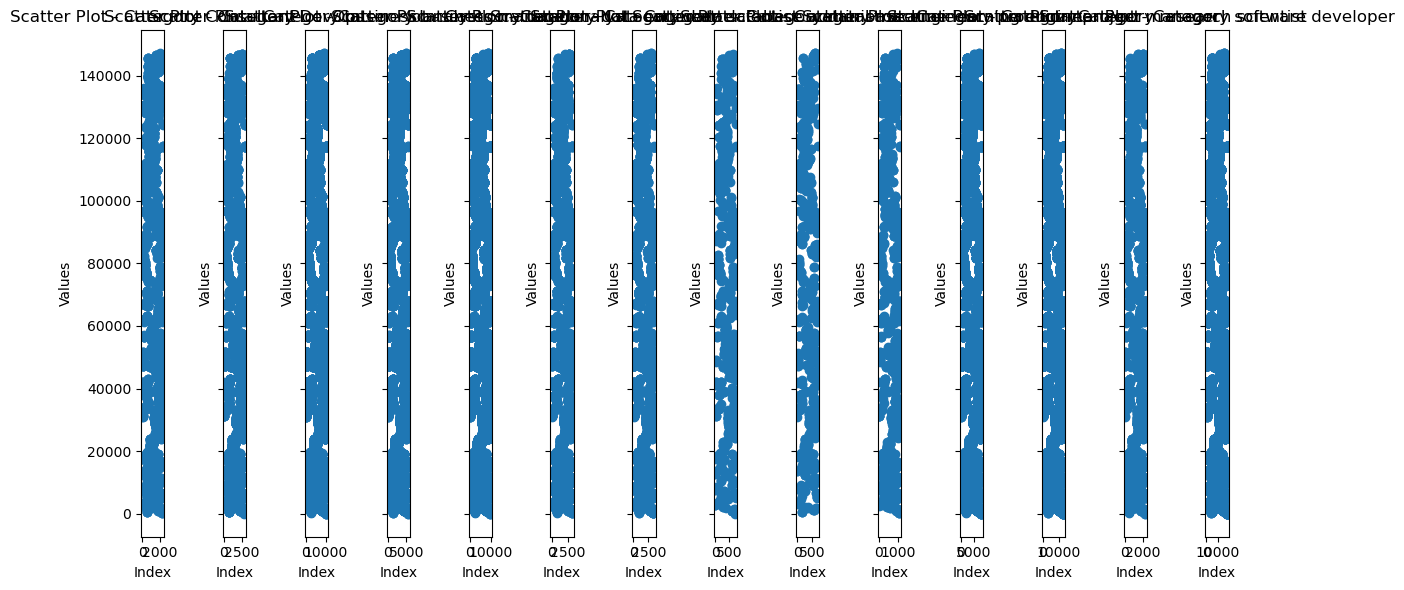

In [45]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=len(job_data2['Cleaned Title'].unique()), figsize=(12, 6), sharey=True)

# Plot scatter plots for each group
for ax, (category, group) in zip(axes, job_data2.groupby('Cleaned Title')):
    ax.scatter(range(len(group)), group['salary.salaries'])
    ax.set_title(f'Scatter Plot - Category {category}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

In [46]:
job_data2.to_excel("cleaned_data_filtered_4.0.xlsx",index=False)